## Market for Transport, Freight, Lorry, Unspecified
The purpose of this notebook is to disaggregate the `market for transport, freight, lorry, unspecified`, which is the most abundantly used truck transport process, to show its assumed market share and fuel economy, to make a point.

In [1]:
STUDY_PATH = '/data/GitHub/2018/variability_jlca/'
CATALOG = STUDY_PATH + 'catalog'

In [2]:
from antelope_catalog import LcCatalog
from lcatools import enum

In [3]:
cat = LcCatalog(CATALOG, quell_biogenic_CO2=True)

Loading JSON data from /data/GitHub/lca-tools/lcatools/qdb/data/flowable_synlist.json:
Loading JSON data from /data/GitHub/lca-tools/lcatools/qdb/data/quantity_synlist.json:
local.qdb: /data/GitHub/2018/variability_jlca/catalog/reference-quantities.json
Loading JSON data from /data/GitHub/2018/variability_jlca/catalog/reference-quantities.json:
local.qdb: /data/GitHub/lca-tools/lcatools/qdb/data/elcd_reference_quantities.json
6 new flow entities added (6 total)
25 new quantity entities added (25 total)


In [17]:
m_t_f_l_u = next(cat.query('local.ecoinvent.3.4.apos').processes(Name='^market for transport, freight, lorry, unspecified'))

In [5]:
import re

In [95]:
# Recursive function. Activities whose name starts with "market" are recursed; otherwise they are evaluated
def crawl_tree(query, node_ref, search_term, activity_level=1.0, debug=False):
    node = query.get(node_ref)
    if debug:
        print('Found %s' % node)
    if node['Name'].startswith('market') or node['Name'].find('to generic market') > 0:
        if debug:
            print('Market -- recursing')
        print('\n(%g) %s' % (activity_level, node._name))
        for x in node.inventory(node.reference()):
            al = activity_level * x.value
            for y in crawl_tree(query, x.termination, search_term, activity_level=al, debug=debug):
                yield y
    else:
        if debug:
            print('Non-market -- looking for hits')
        _need_print = True
        for x in node.inventory(node.reference()):
            if x.flow == node.reference().flow:
                if debug:
                    print(' --> flow matches. recursing')
                al = activity_level * x.value
                for y in crawl_tree(query, x.termination, search_term, activity_level=al, debug=debug):
                    yield y

            elif bool(re.search(search_term, x.flow['Name'], flags=re.IGNORECASE)):
                if _need_print:
                    print('(%g) %s' % (activity_level, node._name))
                    _need_print = False
                print('%s' % x)
                yield x, activity_level

In [16]:
m_t_f_l_u.show()

ProcessRef catalog reference (04583585-fa08-4ef3-af06-184a7e83f025)
origin: local.ecoinvent.3.4.apos
UUID: 04583585-fa08-4ef3-af06-184a7e83f025
   Name: transport, freight, lorry, all sizes, EURO6 to generic market for transport, freight, lorry, unspecified
Comment: This is a linking activity which transfers part of the production volume of the specific transport, freight, lorry of all sizes, EURO6 to the generic market for transport, freight, lorry, unspecified.
The transport, freight, lorry, unspecified is meant to be used by activities, where the size and EURO class of the transport supplied is unkown. 
[This dataset is meant to replace the following datasets:]
==Local Fields==
   SpatialScope: RER
  TemporalScope: {'begin': '2010-01-01', 'end': '2017-12-31'}
Classifications: ['ISIC rev.4 ecoinvent: 4923:Freight transport by road']


In [41]:
exs = [x for x in crawl_tree(cat.query('local.ecoinvent.3.4.apos'), 
                             m_t_f_l_u.external_ref, 
                             'diesel', 
                             debug=False)]


(0.0220344) transport, freight, lorry >32 metric ton, EURO3 [RER]
 Input:     [0.0196 [kg]] (#) diesel, low-sulfur [By-product classification: allocatable product]

(0.0542093) transport, freight, lorry >32 metric ton, EURO3 [RoW]
 Input:     [0.0196 [kg]] (#) diesel, low-sulfur [By-product classification: allocatable product]

(0.0125911) transport, freight, lorry 16-32 metric ton, EURO3 [RER]
 Input:     [0.0378 [kg]] (#) diesel, low-sulfur [By-product classification: allocatable product]

(0.0309767) transport, freight, lorry 16-32 metric ton, EURO3 [RoW]
 Input:     [0.0378 [kg]] (#) diesel, low-sulfur [By-product classification: allocatable product]

(0.00123442) transport, freight, lorry 3.5-7.5 metric ton, EURO3 [RER]
 Input:     [0.111 [kg]] (#) diesel, low-sulfur [By-product classification: allocatable product]

(0.00303693) transport, freight, lorry 3.5-7.5 metric ton, EURO3 [RoW]
 Input:     [0.111 [kg]] (#) diesel, low-sulfur [By-product classification: allocatable product

In [43]:
sum([x[1] for x in exs])

0.9999999999999989

In [45]:
set([x[0].value for x in exs])

{0.019151250203,
 0.0191707074621,
 0.0191933644204,
 0.0195949765528,
 0.036646054,
 0.037443203,
 0.037468754,
 0.037849162,
 0.047208299,
 0.047302103,
 0.047331844,
 0.0480754,
 0.109299836,
 0.109559058,
 0.109600812,
 0.11116978}

In [47]:
from collections import defaultdict

In [54]:
dd = defaultdict(float)
for x in exs:
    dd[round(x[0].value, 5)] += x[1]

In [55]:
sorted(dd.items())

[(0.01915, 0.24386639077741623),
 (0.01917, 0.08867868755542418),
 (0.01919, 0.014779781259237356),
 (0.01959, 0.263819095477387),
 (0.03665, 0.007389890629618678),
 (0.03744, 0.12415016257759365),
 (0.03747, 0.042122376588826324),
 (0.03785, 0.15075376884422065),
 (0.04721, 0.0014779781259237354),
 (0.0473, 0.004433934377771207),
 (0.04733, 0.012562814070351747),
 (0.04808, 0.01773573751108482),
 (0.1093, 0.0031037540644398482),
 (0.10956, 0.009606857818504268),
 (0.1096, 0.0007389890629618677),
 (0.11117, 0.014779781259237346)]

In [56]:
from matplotlib import pyplot as plt
%matplotlib inline

In [63]:
def stem_plot_inputs(query, node_ref, search_term, debug=False, digits=4, **kwargs):
    exs = [x for x in crawl_tree(query, node_ref, search_term, debug=debug)]
    sal = sum([x[1] for x in exs])
    uvl = set([round(x[0].value, digits) for x in exs])
    print('Check:\nsum of activity levels: %g\nlen of unique values: %d' % (sal, len(uvl)))
    dd = defaultdict(float)
    for x in exs:
        dd[round(x[0].value, digits)] += x[1]
    _a, _b, _c = plt.stem(*zip(*dd.items()))
    _c.set_visible(False)
    plt.xlabel(search_term)
    plt.ylabel('market share')


(0.0220344) transport, freight, lorry >32 metric ton, EURO3 [RER]
Output:     [0.000508 [kg]]     Nitrogen oxides (CAS 011104-93-1) [unspecified]

(0.0542093) transport, freight, lorry >32 metric ton, EURO3 [RoW]
Output:     [0.000508 [kg]]     Nitrogen oxides (CAS 011104-93-1) [unspecified]

(0.0125911) transport, freight, lorry 16-32 metric ton, EURO3 [RER]
Output:     [0.000946 [kg]]     Nitrogen oxides (CAS 011104-93-1) [unspecified]

(0.0309767) transport, freight, lorry 16-32 metric ton, EURO3 [RoW]
Output:     [0.000946 [kg]]     Nitrogen oxides (CAS 011104-93-1) [unspecified]

(0.00123442) transport, freight, lorry 3.5-7.5 metric ton, EURO3 [RER]
Output:     [0.00251 [kg]]     Nitrogen oxides (CAS 011104-93-1) [unspecified]

(0.00303693) transport, freight, lorry 3.5-7.5 metric ton, EURO3 [RoW]
Output:     [0.00251 [kg]]     Nitrogen oxides (CAS 011104-93-1) [unspecified]

(0.00148131) transport, freight, lorry 7.5-16 metric ton, EURO3 [RER]
Output:     [0.00114 [kg]]     Nitr

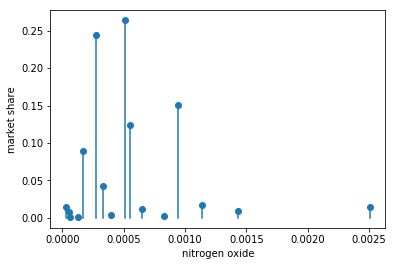

In [71]:
stem_plot_inputs(cat.query('local.ecoinvent.3.4.apos'), m_t_f_l_u.external_ref, 'nitrogen oxide', digits=8)


(0.0220344) transport, freight, lorry >32 metric ton, EURO3 [RER]
 Input:     [0.0196 [kg]] (#) diesel, low-sulfur [By-product classification: allocatable product]

(0.0542093) transport, freight, lorry >32 metric ton, EURO3 [RoW]
 Input:     [0.0196 [kg]] (#) diesel, low-sulfur [By-product classification: allocatable product]

(0.0125911) transport, freight, lorry 16-32 metric ton, EURO3 [RER]
 Input:     [0.0378 [kg]] (#) diesel, low-sulfur [By-product classification: allocatable product]

(0.0309767) transport, freight, lorry 16-32 metric ton, EURO3 [RoW]
 Input:     [0.0378 [kg]] (#) diesel, low-sulfur [By-product classification: allocatable product]

(0.00123442) transport, freight, lorry 3.5-7.5 metric ton, EURO3 [RER]
 Input:     [0.111 [kg]] (#) diesel, low-sulfur [By-product classification: allocatable product]

(0.00303693) transport, freight, lorry 3.5-7.5 metric ton, EURO3 [RoW]
 Input:     [0.111 [kg]] (#) diesel, low-sulfur [By-product classification: allocatable product

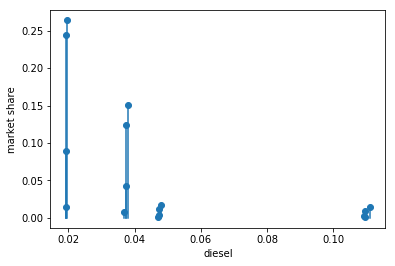

In [69]:
stem_plot_inputs(cat.query('local.ecoinvent.3.4.apos'), m_t_f_l_u.external_ref, 'diesel', digits=6)

<StemContainer object of 3 artists>

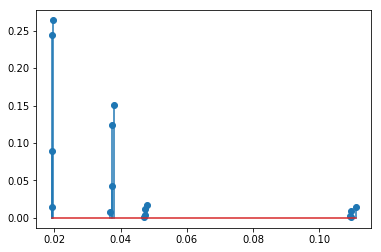

In [58]:
plt.stem(*zip(*dd.items()))

In [73]:
qa = cat.query('local.ecoinvent.3.4.apos')
ref = m_t_f_l_u.external_ref

## Market duplication


In [98]:
from antelope_reports.tables import AllocationGrid

In [99]:
def _gen_terms(cat, _activity):
    for x in _activity.inventory(_activity.reference()):
        if x.termination is not None:
            yield cat.query(_activity.origin).get(x.termination)

In [102]:
ag = AllocationGrid(qa, *_gen_terms(cat, m_t_f_l_u), report_unallocated=False)

In [105]:
ag.dataframe()

,Direction,Ref,C0,C1,C2,C3,C4,C5,C6,C7,Flow,Comment
0,Output,{*},1,1,1,1,1,1,1,1,[metric ton*km] [local.ecoinvent.3.4.apos] tra...,
1,Input,,0.337,,,,0.337,,,,"[metric ton*km] market for transport, freight,...",Calculated from the production volumes.\n\nThe...
2,Input,,,,,0.303,,,,0.303,"[metric ton*km] market for transport, freight,...",Calculated from the production volumes.\n\nThe...
3,Input,,0.0331,,,,0.0331,,,,"[metric ton*km] market for transport, freight,...",Calculated from the production volumes.\n\nThe...
4,Input,,,0.0246,,,,0.0246,,,"[metric ton*km] market for transport, freight,...",Calculated from the production volumes.\n\nThe...
5,Input,,,,0.0224,,,,0.0224,,"[metric ton*km] market for transport, freight,...",Calculated from the production volumes.\n\nThe...
6,Input,,,0.0322,,,,0.0322,,,"[metric ton*km] market for transport, freight,...",Calculated from the production volumes.\n\nThe...
7,Input,,,0.318,,,,0.318,,,"[metric ton*km] market for transport, freight,...",Calculated from the production volumes.\n\nThe...
8,Input,,,,0.304,,,,0.304,,"[metric ton*km] market for transport, freight,...",Calculated from the production volumes.\n\nThe...
9,Input,,,,,0.0303,,,,0.0303,"[metric ton*km] market for transport, freight,...",Calculated from the production volumes.\n\nThe...


### NOx and PM emissions
Reporting emission factors in g/kg fuel for comparison to `10.1016/j.atmosenv.2012.01.068` "On-board measurements of emissions from diesel trucks in five cities in China"

That paper table 2 reports emissions per km travel and per kg fuel:


	g km−1	g kg−1 of fuel
HC	CO	NOx	PM2.5	HC	CO	NOx	PM2.5
LDDTs
Euro 0	2.1 ± 0.5	6.0 ± 4.9	4.3 ± 1.2	0.35 ± 0.18	19.2 ± 2.6	57 ± 48	41 ± 14	3.6 ± 1.7
Euro I	1.4 ± 0.6	3.3 ± 3.0	5.0 ± 2.1	0.23 ± 0.19	13.6 ± 5.6	32 ± 25	49 ± 17	2.3 ± 1.9
Euro II	1.2 ± 0.5	2.9 ± 2.1	5.3 ± 2.2	0.17 ± 0.13	10.4 ± 4.6	25 ± 18	44 ± 15	1.4 ± 1.0
Euro III	0.6 ± 0.4	1.1 ± 0.4	3.2 ± 1.9	0.01 ± 0.00	7.8 ± 5.8	14 ± 6	36 ± 8	0.15 ± 0.05

MDDTs
Euro 0	2.4 ± 1.3	5.4 ± 2.0	10.7 ± 3.6	0.55 ± 0.45	12.5 ± 5.5	28 ± 8	57 ± 18	2.9 ± 2.4
Euro I	1.4 ± 0.6	3.8 ± 1.7	9.7 ± 2.6	0.49 ± 0.29	7.8 ± 3.0	21 ± 9	54 ± 14	2.7 ± 1.7
Euro II	0.3 ± 0.1	1.1 ± 0.3	3.6 ± 0.8	0.07 ± 0.05	2.6 ± 1.4	10 ± 1	34 ± 11	0.73 ± 0.70
Euro III	0.2 ± 0.1	1.5 ± 1.2	6.4 ± 1.9	0.11 ± 0.08	1.7 ± 0.9	11 ± 6	49 ± 6	0.94 ± 0.61

HDDTs
Euro 0	1.9	18.6	14.8	0.91	7.6	75	60	3.7
Euro I	1.4 ± 0.7	5.5 ± 4.2	9.9 ± 5.0	0.26 ± 0.23	6.7 ± 2.7	26 ± 14	50 ± 23	1.3 ± 1.2
Euro II	1.0 ± 0.8	6.3 ± 5.0	10.2 ± 7.5	0.23 ± 0.20	4.0 ± 2.8	26 ± 22	44 ± 25	1.2 ± 1.0
Euro III	0.3 ± 0.2	1.6 ± 0.9	8.1 ± 4.2	0.09 ± 0.10	2.1 ± 1.6	10 ± 4	51 ± 15	0.52 ± 0.55
Euro IV	–	1.2 ± 0.4	5.3 ± 1.2	0.02 ± 0.00	–	8 ± 3	36 ± 11	0.11 ± 0.01


In [96]:
exs_nox = [x for x in crawl_tree(qa, ref, 'nitrogen oxide')]


(1) market for transport, freight, lorry, unspecified [GLO]

(0.129209) transport, freight, lorry, all sizes, EURO3 to generic market for transport, freight, lorry, unspecified [RER]

(0.0762437) market for transport, freight, lorry >32 metric ton, EURO3 [GLO]
(0.0220344) transport, freight, lorry >32 metric ton, EURO3 [RER]
Output:     [0.000508 [kg]]     Nitrogen oxides (CAS 011104-93-1) [unspecified]
(0.0542093) transport, freight, lorry >32 metric ton, EURO3 [RoW]
Output:     [0.000508 [kg]]     Nitrogen oxides (CAS 011104-93-1) [unspecified]

(0.0435678) market for transport, freight, lorry 16-32 metric ton, EURO3 [GLO]
(0.0125911) transport, freight, lorry 16-32 metric ton, EURO3 [RER]
Output:     [0.000946 [kg]]     Nitrogen oxides (CAS 011104-93-1) [unspecified]
(0.0309767) transport, freight, lorry 16-32 metric ton, EURO3 [RoW]
Output:     [0.000946 [kg]]     Nitrogen oxides (CAS 011104-93-1) [unspecified]

(0.00427136) market for transport, freight, lorry 3.5-7.5 metric ton,

In [97]:
exs_fuel = [x for x in crawl_tree(qa, ref, 'diesel')]


(1) market for transport, freight, lorry, unspecified [GLO]

(0.129209) transport, freight, lorry, all sizes, EURO3 to generic market for transport, freight, lorry, unspecified [RER]

(0.0762437) market for transport, freight, lorry >32 metric ton, EURO3 [GLO]
(0.0220344) transport, freight, lorry >32 metric ton, EURO3 [RER]
 Input:     [0.0196 [kg]] (#) diesel, low-sulfur [By-product classification: allocatable product]
(0.0542093) transport, freight, lorry >32 metric ton, EURO3 [RoW]
 Input:     [0.0196 [kg]] (#) diesel, low-sulfur [By-product classification: allocatable product]

(0.0435678) market for transport, freight, lorry 16-32 metric ton, EURO3 [GLO]
(0.0125911) transport, freight, lorry 16-32 metric ton, EURO3 [RER]
 Input:     [0.0378 [kg]] (#) diesel, low-sulfur [By-product classification: allocatable product]
(0.0309767) transport, freight, lorry 16-32 metric ton, EURO3 [RoW]
 Input:     [0.0378 [kg]] (#) diesel, low-sulfur [By-product classification: allocatable product

In [ ]:
exs_nox = [x for x in crawl_tree(qa, ref, 'nitrogen oxide')]

In [76]:
exs_fuel[0]

(<lcatools.exchanges.ExchangeValue at 0x7fb7303969e8>, 0.022034434673366927)

In [84]:
mp = defaultdict(list)
for a in exs_fuel:
    mp[a[0].process].append(a[0].value)
for a in exs_nox:
    mp[a[0].process].append(a[0].value)

In [85]:
len(set(a[0].process for a in exs_fuel))

32

In [87]:
for k, v in mp.items():
    if len(v) == 4:
        if v[0] == v[1] and v[2] == v[3]:
            print('%g %s' % (v[2] * 1000 / v[0], k))

25.9079 transport, freight, lorry >32 metric ton, EURO3 [RER]
25.9079 transport, freight, lorry >32 metric ton, EURO3 [RoW]
24.9968 transport, freight, lorry 16-32 metric ton, EURO3 [RER]
24.9968 transport, freight, lorry 16-32 metric ton, EURO3 [RoW]
22.5761 transport, freight, lorry 3.5-7.5 metric ton, EURO3 [RER]
22.5761 transport, freight, lorry 3.5-7.5 metric ton, EURO3 [RoW]
23.6304 transport, freight, lorry 7.5-16 metric ton, EURO3 [RER]
23.6304 transport, freight, lorry 7.5-16 metric ton, EURO3 [RoW]
14.1146 transport, freight, lorry >32 metric ton, EURO4 [RER]
14.1146 transport, freight, lorry >32 metric ton, EURO4 [RoW]
13.0571 transport, freight, lorry 3.5-7.5 metric ton, EURO4 [RER]
13.0571 transport, freight, lorry 3.5-7.5 metric ton, EURO4 [RoW]
14.6313 transport, freight, lorry 16-32 metric ton, EURO4 [RER]
14.6313 transport, freight, lorry 16-32 metric ton, EURO4 [RoW]
13.6744 transport, freight, lorry 7.5-16 metric ton, EURO4 [RER]
13.6744 transport, freight, lorry 7.5